# COGS 108 - College Graduation Rates and Number of Billionaire Alumni

## Video Presentation

You can view our presentation [here](https://youtu.be/kkPzxYMsTA8).

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Yiyao Liu (A16314015)
- Justin Lee (A15802198)
- Duye Liu (A16601637)
- Sally Yu (A16519059)
- Jie Mei (MJ) (A15825777)

# Overview

Why are so many billionaires college dropouts is probably a question many people have asked and wondered. Because of the fact that the few well-known billionaires — Bill Gates, Mark Zuckerberg, Elon Musk — are all known for being college dropouts, it seems that dropping out of college may be somewhat correlated with business success. In this project, we wish to investigate whether there is a relationship between college dropout rates and the number of billionaire alumni of U.S. universities and see whether data can prove or debunk this widely held myth. To answer this question, we used a dataset that contains information on all U.S. colleges, such as location, type of institution, and graduation rates, and web scraped a dataset from Forbes that contains the ranks, net worth, and education of billionaires of 2021. Because we couldn’t find data on the drop out rates of U.S. colleges, we decided to use the graduation rates instead as a measure for drop out rates. After we cleaned the data by removing irrelevant information and standardizing every column, we merged the two datasets in order to examine the relationship between the graduation rates of U.S. colleges and the number of billionaire alumni of each college. We then made visualizations and ran OLS regression and Pearson correlation tests to explore the potential relationship. For an alpha value of 0.05, we are unable to find a statistically significant relationship between the graduation rates of U.S. colleges and the number of billionaire alumni. Therefore, we conclude with our limited data that there is no correlation between dropout rates of U.S. colleges and the number of billionaire alumni. 


## Background and Prior Work

### Introduction:
The stories about college dropouts becoming billionaires later in life are not news to anyone. Given the two most well-known billionaires in the United States, Bill Gates of Microsoft and Mark Zuckerberg of Facebook, who happened to both be dropouts of Harvard, many people have formed an implicit association between rich people and college dropouts. Although harmless as it seems, this assumption can potentially lead many students into thinking that education is essentially not important for success and make decisions that may not be in their best interest based on this misleading myth. To this end, we want to investigate whether there is a correlation between college dropouts and billionaires by looking at the dropout rates of universities in the United States and comparing them to their number of billionaire alumni in the past 22 years. In this project, we will only focus on universities in the U.S. and analyze data spanning from 2000 to 2021. 

### Prior Work:
https://www.entrepreneur.com/article/311472

Many previous studies have been interested in seeing whether a general correlation between college dropouts and billionaire entrepreneurs exists. A study reported in The Conversation in 2017 found that of all Forbes billionaires, 89.1% had a college education, of which 44.8% were an elite school. Only around 10% of them had no college degree, which shows that dropping out of college is certainly not a norm for becoming a billionaire. The study also examined the Fortune 500 CEOs and 30 other millionaires, of which similar patterns are observed. Given these data, it is easy to draw the conclusion that indeed dropping out of college does not correlate with better success at becoming a billionaire. However, our project is concerned more specifically with the relationship between the dropout rate of individual universities and their number of billionaire alumni and whether a correlation between the two can be drawn considering other factors, such as college ranking and location. Nevertheless, the study provides us with some foundational knowledge on this topic and general statistics to work off of. 

https://www.journalofexpertise.org/articles/volume2_issue1/JoE_2019_2_1_Wai_Kanaya.pdf

Jonathan Wai and Tomoe Kanaya have conducted a study on elite education, cognitive ability, and the gender gap among 14,246 billionaires from 2002-2016. While this study doesn’t implicitly evaluate the correlation between the US college dropout rates and the number of billionaire alumni, it offers invaluable insights on whether higher levels of education play indispensable roles in the formation of billionaires. For instance, any undergraduate institutions, with combined SAT Math and Critical Reading average scores above 1400, were considered as elite schools. A billionaire received elite education if he/she attended either an undergraduate or graduate elite school in the US or abroad. Furthermore, they ranked the number of billionaires who received elite education in different industries. Approximately 50-60% of billionaires in the finance investments and technology sectors had received elite educations in the United States, which were ranked as first and second. If we combine billionaires from different sectors as one entity, roughly 43% of them attended elite schools. On the other hand, nearly 57% of the billionaires did not receive elite education and many of them probably were drop outs. Therefore, this prior research has reinforced the validity and potential of our research question.

https://educationdata.org/college-dropout-rates/

The report from Melanie Hanson on college dropout rates in the United States was comprehensive in terms of its coverage on various attributes. For instance, some general statistics indicated that while Asian Americans had the lowest dropout rate at 10%, African Americans had the highest dropout rates at 54%. Therefore, the ethnicity of college dropouts and billionaires could be utilized as an useful attribute to conduct exploratory data analysis on. In addition, the overall dropout rate of undergraduate students in the United States was 40%, which was close to the percentage of billionaires who attended elite schools in the previous study. Whether this phenomenon was due to regression to the mean or other factors was worth exploring. Last but not least, this report also contained attributes regarding institutional demographics, populational demographics, employment & career prospects, economic impact, and education & socioeconomic status, which could all provide insights to our research question.


# Hypothesis


Famous billionaires including Bill Gates and Steve Jobs are widely known for being successful after dropping out of university, so there is a general stereotype that there is a positive relationship between leaving education early and starting a profitable business. Influenced by their anecdotes, some people argue that one’s educational level does not influence one’s chance of becoming financially successful. We predict that there is a positive correlation between the dropout rates of universities and the number of billionaire alumni. The students who drop out can use their tuition to build their start up, and turn their business into billions of dollars. Consequently, they offer a significant amount of donations back to universities.

# Dataset(s)

Because we were unable to find any data on the drop out rates of universities, we instead decided to use graduation rates within the expected time to and the number of billionaire alumni.

- **Dataset Name:** 2021 Forbes Billionaires
- **Link to the dataset:** https://www.kaggle.com/roysouravcu/forbes-billionaires-of-2021
- **Number of observations:** 2752

This dataset contains the data on worldwide billionaires ranked by Forbes. The attributes include the billionaires' names, networth, countries, soruces, ranks, and industries. We have added columns of educations and dropouts, which include the institutions where billionaires graduated from and whether they were dropouts. These information, along with those from the college completion institution dataset, will help us to explore and address our research question. 

- **Dataset Name:** College Completion Institution Details
- **Link to the dataset:** https://data.world/databeats/college-completion
- **Number of observations:** 3798

This dataset provides data on a large number of U.S. colleges, which includes each college's location, type of institution, and most importantly graduation completion rate, which we can use to proportion of students who were unable to graduate within 4 years.

**We will combine these two datasets using the names of colleges as unique identifiers.**

<a id='research_question'></a>
# Research Question

**Is there a correlation between the graduation within expected time rates of universities in the United States and the number of billionaire alumni since 2000?**

# Setup

In [1]:
import requests  
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from requests.exceptions import MissingSchema
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
from scipy.stats import pearsonr
from IPython.display import Image

# Data Cleaning

**From the 2021 Forbes Billionaires dataset we found online(https://www.kaggle.com/roysouravcu/forbes-billionaires-of-2021), we stored their names in a csv file named billionaire_raw.csv.**

**Read in billionaire_raw.csv and take a look at it**

In [2]:
df = pd.read_csv('billionaire_raw.csv')
df.head()

,Unnamed: 0,Name,NetWorth,Country,Source,Rank,Industry
0,0,Jeff Bezos,$177 B,United States,Amazon,1,Technology
1,1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,Automotive
2,2,Bill Gates,$124 B,United States,Microsoft,4,Technology
3,3,Mark Zuckerberg,$97 B,United States,Facebook,5,Technology
4,4,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,Finance & Investments


**Since our research question focuses on the correlation between the universities and billionaires in the United States, We will be filtering out information of billionaires outside of the States.**

In [3]:
df = df[df['Country'] == 'United States']
df.head()

,Unnamed: 0,Name,NetWorth,Country,Source,Rank,Industry
0,0,Jeff Bezos,$177 B,United States,Amazon,1,Technology
1,1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,Automotive
2,2,Bill Gates,$124 B,United States,Microsoft,4,Technology
3,3,Mark Zuckerberg,$97 B,United States,Facebook,5,Technology
4,4,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,Finance & Investments


**Let's take a look at the dimensions of our current billionaire dataset**

In [4]:
df.shape

(724, 7)

**Let's check if there are any nans in our billionaire dataset.**

In [5]:
df.isnull().sum()

Unnamed: 0    0
Name          0
NetWorth      0
Country       0
Source        0
Rank          0
Industry      8
dtype: int64

**As you can see, there are four nans in the age column, some billionaires might be less inclined to share their ages. Since the quantity of nans is small, we decide to keep these rows that contain the nans. The reason is that we don't want to miss out any potential valuable information on the billionaires**

**Now we still need data on which universities these U.S. billionaires graduated or dropped out from. We will use BeautifulSoup to scrape this data from forbes worlds' billionaires list of 2021, where they list each billionaire's education background on the profile page of each billionaire (for example, https://www.forbes.com/profile/elon-musk/?sh=37e6593f7999).**

**We have 724 U.S. billionaires. For scraping, we need to generate an url for each of them using their names. Therefore, we wrote a function to standardizing their names with the corresponding urls that contain their enducation information.**

In [6]:
# define a function that changes names into urls
def standardize_names(str_in):
    
    try:
        ## change strings to lowercases
        str_in = str_in.lower()
        
        ## strip all the leading and trailing spaces 
        str_in = str_in.strip()
        
        ## replace whitespaces with dashes
        output = str_in.replace(' ', '-')
        
        ## initialize the billionaire profile url
        url_start = 'https://www.forbes.com/profile/'
        
        ## output cpntaining the url and names
        output = url_start + output
        
    except:
        
        ## avoid outputs containing nans
        output = np.nan
        
    ## return the output   
    return output

**Let's apply the standardize_names function to the Name column and store these results into a new column called urls**

In [7]:
df['urls'] = df['Name'].apply(standardize_names)

**Let's take a look at our current billionaire dataframe**

In [8]:
df.head()

,Unnamed: 0,Name,NetWorth,Country,Source,Rank,Industry,urls
0,0,Jeff Bezos,$177 B,United States,Amazon,1,Technology,https://www.forbes.com/profile/jeff-bezos
1,1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,Automotive,https://www.forbes.com/profile/elon-musk
2,2,Bill Gates,$124 B,United States,Microsoft,4,Technology,https://www.forbes.com/profile/bill-gates
3,3,Mark Zuckerberg,$97 B,United States,Facebook,5,Technology,https://www.forbes.com/profile/mark-zuckerberg
4,4,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,Finance & Investments,https://www.forbes.com/profile/warren-buffett


**Now, let's start the web scraping process!First of all, we need to create a new column called Education_info to store the to be scraped content. We will implement the beautifulsoup package of python. We will loop through each billionaire's profile and locate the education tag. Consequently, we will avoid any nans and append the results in a temporal list**

In [9]:
#create a new column called Education_info, where we'll save the final results in
df['Education_info'] = df['urls']

Education_scraped = []
for url in df['urls']:
    try:
        r = requests.get(url)
        soup = BeautifulSoup(r.text)
    
        try:
             # locate to the "Education" tag of each person
            Education  = soup.find('span',text = 'Education')
            
            # go to the parent tag of Education, and access the content of the next tag of Education
            Education = Education.parent.contents[1].text
            
        except:
            Education = None
        
    except MissingSchema:
        Education = None
        
    #  save the scraped string in the temporal list
    Education_scraped.append(Education)

**Let's take a look at the data we have accquired from scraping**

In [10]:
Education_scraped[:10]

['Bachelor of Arts/Science, Princeton University',
 'Bachelor of Arts/Science, University of Pennsylvania',
 'Drop Out, Harvard University',
 'Drop Out, Harvard University',
 'Master of Science, Columbia University; Bachelor of Arts/Science, University of Nebraska Lincoln',
 'Drop Out, University of Chicago; Drop Out, University of Illinois, Urbana-Champaign',
 'Master of Science, Stanford University; Bachelor of Arts/Science, University of Michigan',
 'Master of Science, Stanford University; Bachelor of Arts/Science, University of Maryland, College Park',
 'Bachelor of Arts/Science, Harvard University; Drop Out, Stanford University',
 'Bachelor of Arts/Science, Trinity University']

**It is time to store these education information of billionaires into our dataframe's Education_info and take a look at our dataset**

In [11]:
df['Education_info'] = Education_scraped
df.head()

,Unnamed: 0,Name,NetWorth,Country,Source,Rank,Industry,urls,Education_info
0,0,Jeff Bezos,$177 B,United States,Amazon,1,Technology,https://www.forbes.com/profile/jeff-bezos,"Bachelor of Arts/Science, Princeton University"
1,1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,Automotive,https://www.forbes.com/profile/elon-musk,"Bachelor of Arts/Science, University of Pennsy..."
2,2,Bill Gates,$124 B,United States,Microsoft,4,Technology,https://www.forbes.com/profile/bill-gates,"Drop Out, Harvard University"
3,3,Mark Zuckerberg,$97 B,United States,Facebook,5,Technology,https://www.forbes.com/profile/mark-zuckerberg,"Drop Out, Harvard University"
4,4,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,Finance & Investments,https://www.forbes.com/profile/warren-buffett,"Master of Science, Columbia University; Bachel..."


**Last but not least, we want to export the current data as a brand new csv file for the convenience of further cleaing and later analysis**

In [12]:
# save the df as a csv file
df.to_csv('billionaire_scraped.csv')

**Let's read in the billionaire_scraped csv file and assign it to df_colleege**

In [13]:
# read in billionaire dataset
df_college = pd.read_csv('billionaire_scraped.csv')
df_college

,Unnamed: 0,Unnamed: 0.1,Name,NetWorth,Country,Source,Rank,Industry,urls,Education_info
0,0,0,Jeff Bezos,$177 B,United States,Amazon,1,Technology,https://www.forbes.com/profile/jeff-bezos,"Bachelor of Arts/Science, Princeton University"
1,1,1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,Automotive,https://www.forbes.com/profile/elon-musk,"Bachelor of Arts/Science, University of Pennsy..."
2,2,2,Bill Gates,$124 B,United States,Microsoft,4,Technology,https://www.forbes.com/profile/bill-gates,"Drop Out, Harvard University"
3,3,3,Mark Zuckerberg,$97 B,United States,Facebook,5,Technology,https://www.forbes.com/profile/mark-zuckerberg,"Drop Out, Harvard University"
4,4,4,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,Finance & Investments,https://www.forbes.com/profile/warren-buffett,"Master of Science, Columbia University; Bachel..."
...,...,...,...,...,...,...,...,...,...,...
719,719,719,Vlad Tenev,$1 B,United States,stock trading,2674,Finance & Investments,https://www.forbes.com/profile/vlad-tenev,"Bachelor of Arts/Science, Stanford University"
720,720,720,Vlad Vendrow & family,$1 B,United States,software,2674,Technology,https://www.forbes.com/profile/vlad-vendrow-&-...,NaN
721,721,721,J. Wayne Weaver,$1 B,United States,Shoes,2674,Diversified,https://www.forbes.com/profile/j.-wayne-weaver,NaN
722,722,722,Sandy Weill,$1 B,United States,Citigroup,2674,Finance & Investments,https://www.forbes.com/profile/sandy-weill,"Bachelor of Arts/Science, Cornell University"


**Let's check the number of nan values in the current dataset.**

In [14]:
df_college.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
Name                0
NetWorth            0
Country             0
Source              0
Rank                0
Industry            8
urls                0
Education_info    181
dtype: int64

**We want to drop all the rows that contain nan values in the Education_info because our research question focuses on the correlation between graduation within expected time rates of univerisities and the US billionaires. If the billionaires' education info includes a nan value, then this billionaire essentially doesn't provide us any valuable information. In addition, we only want to include billionaires' undergraduate education information. Therefore, we filter those who only contain PHD or Master degrees out.**

In [15]:
df_college = df_college.dropna(subset=['Education_info'])
df_college = df_college[df_college['Education_info'].str.contains('Bachelor|Drop Out')].reset_index()
df_college

,index,Unnamed: 0,Unnamed: 0.1,Name,NetWorth,Country,Source,Rank,Industry,urls,Education_info
0,0,0,0,Jeff Bezos,$177 B,United States,Amazon,1,Technology,https://www.forbes.com/profile/jeff-bezos,"Bachelor of Arts/Science, Princeton University"
1,1,1,1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,Automotive,https://www.forbes.com/profile/elon-musk,"Bachelor of Arts/Science, University of Pennsy..."
2,2,2,2,Bill Gates,$124 B,United States,Microsoft,4,Technology,https://www.forbes.com/profile/bill-gates,"Drop Out, Harvard University"
3,3,3,3,Mark Zuckerberg,$97 B,United States,Facebook,5,Technology,https://www.forbes.com/profile/mark-zuckerberg,"Drop Out, Harvard University"
4,4,4,4,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,Finance & Investments,https://www.forbes.com/profile/warren-buffett,"Master of Science, Columbia University; Bachel..."
...,...,...,...,...,...,...,...,...,...,...,...
495,710,710,710,Larry Fink,$1 B,United States,money management,2674,Finance & Investments,https://www.forbes.com/profile/larry-fink,"Master of Business Administration, Anderson Sc..."
496,712,712,712,David Katzman,$1 B,United States,teeth aligners,2674,Service,https://www.forbes.com/profile/david-katzman,"Bachelor of Arts/Science, Michigan State Unive..."
497,713,713,713,Bom Kim,$1 B,United States,online retailing,2674,Technology,https://www.forbes.com/profile/bom-kim,"Bachelor of Arts/Science, Harvard University"
498,719,719,719,Vlad Tenev,$1 B,United States,stock trading,2674,Finance & Investments,https://www.forbes.com/profile/vlad-tenev,"Bachelor of Arts/Science, Stanford University"


**Let's take a look at the dimension of our current dataset.**

In [16]:
df_college.shape

(500, 11)

**Since the Unnamed:0 and urls columns are irrelevant information to our analysis, we will drop them from the existing dataset.**

In [17]:
df_college = df_college[['Name', 'NetWorth','Source','Rank','Industry','Education_info']]
df_college

,Name,NetWorth,Source,Rank,Industry,Education_info
0,Jeff Bezos,$177 B,Amazon,1,Technology,"Bachelor of Arts/Science, Princeton University"
1,Elon Musk,$151 B,"Tesla, SpaceX",2,Automotive,"Bachelor of Arts/Science, University of Pennsy..."
2,Bill Gates,$124 B,Microsoft,4,Technology,"Drop Out, Harvard University"
3,Mark Zuckerberg,$97 B,Facebook,5,Technology,"Drop Out, Harvard University"
4,Warren Buffett,$96 B,Berkshire Hathaway,6,Finance & Investments,"Master of Science, Columbia University; Bachel..."
...,...,...,...,...,...,...
495,Larry Fink,$1 B,money management,2674,Finance & Investments,"Master of Business Administration, Anderson Sc..."
496,David Katzman,$1 B,teeth aligners,2674,Service,"Bachelor of Arts/Science, Michigan State Unive..."
497,Bom Kim,$1 B,online retailing,2674,Technology,"Bachelor of Arts/Science, Harvard University"
498,Vlad Tenev,$1 B,stock trading,2674,Finance & Investments,"Bachelor of Arts/Science, Stanford University"


**The Education_info column is in an extremely haphazard format. Therefore, we want to construct a function to standardize the content into straightforward names of undergraduate institutions.**

In [18]:
def standardize_name(string):
    string = string.strip()
    string = string.replace('Bachelor of Arts/Science,','')
    string = string.replace('Master of Science, ','')
    string = string.replace('Master of Business Administration,','')
    string = string.replace('Drop Out,','')
    string = string.replace('Anderson School of Management;','')
    string = string.replace('Columbia University;','')
    string = string.replace('Doctor of Jurisprudence,','')
    string = string.replace('Bachelor of Science,','')
    string = string.replace('Diploma, The Hotchkiss School;','')
    string = string.replace('Harvard Business School;  ','')
    string = string.replace('Master of Arts/Science,','')
    string = string.replace('Stanford University;  ','')
    string = string.replace('Harvard University;  ','')
    string = string.replace('; LLB, Wayne State University','')
    string = string.replace('Massachusetts Institute of Technology; ','')
    string = string.replace('Doctorate, ','')
    string = string.replace('Princeton University; ','')
    string = string.replace('University of California, San Diego; ','')
    string = string.replace(', The Wharton School','')
    string = string.replace('New York University;  ','')
    string = string.replace('David A. Tepper School of Business;  ','')
    string = string.replace('Bachelor of Engineering, ','')
    string = string.replace(';  Samuel Curtis Johnson Graduate School of Management','')
    string = string.replace('Doctorate, California Institute of Technology;  ','')
    string = string.replace(';  Stanford Business School','')
    string = string.replace('Delhi University;  Delhi University; ','')
    string = string.replace('Stanford Graduate School of Business;  ','')
    string = string.replace('LLB, ','')
    string = string.replace('Cleveland State University;  ','')
    string = string.replace('; Law Degree, New York University','')
    string = string.replace('Cleveland State University;  ','')
    string = string.replace('University of Southern California; ','')
    string = string.replace('Cornell University; ','')
    string = string.replace('Georgetown University;  ','')
    string = string.replace('; Masters of Public Health, UCLA;  University of California, Irvine','')
    string = string.replace(';  Harvard Law School','')
    string = string.replace('Colby College;  ','')
    string = string.replace(';  University of Western Ontario','')
    string = string.replace('; Master of Philosophy, Oxford University','')
    string = string.replace('Bachelor of Arts/Economics, ','')
    string = string.replace('Columbia Business School;  ','')
    string = string.replace('INSEAD;  ','')
    string = string.replace('; Ph.D, University of Wisconsin Madison','')
    string = string.replace('; California Polytechnic State University','')
    string = string.replace('Medical Doctor, Hahnemann Medical College;  ','')
    string = string.replace('CW Post College; ','')
    string = string.replace('Lake Forest College;  ','')
    string = string.replace('; Law Degree, Northwestern University','')
    string = string.replace('Stanford Graduate School of Business;  ','')
    string = string.replace(';  University of Madras','')
    string = string.replace(';  University of Phoenix','')
    string = string.replace(' University of Pennsylvania;  ','')
    string = string.replace(', Stephen M. Ross School of Business','')
    string = string.replace('Indian Institute of Technology, Bombay;  ','')
    string = string.replace(';  Harvard Business School','')
    string = string.replace('Bachelor of Science in Engineering, ','')
    string = string.replace('Stanford Business School;  ','')
    string = string.replace('; Medical Doctor, Indiana University','')
    string = string.replace(';  University of Chicago;  University of Pennsylvania;  University of Pennsylvania','')
    string = string.replace('Columbia Business School;  ','')
    string = string.replace(';  The University of Chicago; Williams College','')
    string = string.replace('; Santa Clara University','')
    string = string.strip()
    string = string.replace(';  University of Illinois, Urbana-Champaign','')
    string = string.replace('; University of California, Berkeley','')
    string = string.replace(';  University of California, Berkeley','')
    string = string.replace('Bachelor of Technology, ','')
    string = string.replace(';  Tippie School of Management','')
    string = string.replace('Bachelor of Business Administration, ','')
    string = string.replace(';  Wake Forest University School of Business','')
    string = string.replace('; Master of Arts, University of Arkansas','')
    string = string.replace('Diploma, High School;  ','')
    string = string.replace('Law Degree, American University;  ','')
    string = string.replace('Master, Drexel University;  ','')
    string = string.replace('Dartmouth College;  ','')
    string = string.replace('Robert J. Trulaske, Sr. College of Business;  ','')
    string = string.replace('; Johns Hopkins University;  Yale University','')
    string = string.replace(';  UC Hastings','')
    string = string.replace(';  University of Witwatersrand; Medical Doctor, University of Witwatersrand','')
    string = string.replace(';  Columbia Business School','')
    string = string.replace('; Diploma, High School','')
    string = string.replace(';  University of Missouri','')
    string = string.replace('Master of Laws, University of Michigan;  ','')
    string = string.replace('Broad College of Business;  ','')
    string = string.replace(';  Rice University','')
    string = string.replace('; North Carolina State University; North Carolina State University','')
    string = string.replace('; Stanford University','')
    string = string.replace('; Master of Arts, Western Michigan University','')
    string = string.replace('; University of California, Los Angeles; University of California, Los Angeles','')
    string = string.replace('Dickinson College; ','')
    string = string.replace(';  University of Houston','')
    string = string.replace('MIT Sloan School of Management','Massachusetts Institute of Technology')
    string = string.replace('Christ Church, Oxford University;  ','')
    string = string.replace('California State Polytechnical University; ','')
    string = string.replace('; University of Minnesota','')
    string = string.replace(';  University of Michigan','')
    string = string.replace('Bowdoin College; ','')
    string = string.replace('; University of Illinois, Urbana-Champaign','')
    string = string.replace(';  Leonard N. Stern School of Business','')
    string = string.replace('Creighton University;  ','')
    string = string.replace(';  University of Houston','')
    string = string.replace('Claremont McKenna College;  ','')
    string = string.replace(';  University of Chicago','')
    string = string.replace('; Master of Science in Engineering, Stanford University ','')
    string = string.replace(';  Stanford University','')
    string = string.replace(';  University of Southern California','')
    string = string.replace('Leonard N. Stern School of Business;  ','')
    string = string.replace('; Tsinghua University','')
    string = string.replace('; Master of Architecture, University of California, Berkeley','')
    string = string.replace('Indian Institute of Technology;  ','')
    string = string.replace('; Master of Science in Engineering, Stanford University','')
    string = string.replace(';  The University of Texas at Austin','')
    string = string.replace(';  Southwestern Law School','')
    string = string.replace(';  University of Pennsylvania','')
    string = string.replace('; Vanderbilt University','')
    string = string.replace('New York Law School;  ','')
    string = string.replace('Chinese Culture University;  ','')
    string = string.replace('Associate in Arts/Science, ','')
    string = string.replace(';  Southern College of Optometry; Southern College of Optometry','')
    string = string.replace('Brooklyn Law School;  ','')
    string = string.replace(';  Washington University in St. Louis','')
    string = string.replace('Harvard Law School; ','')
    string = string.replace(';  Stanford Graduate School of Business','')
    string = string.replace('; Master of Arts, Northern Illinois University','')
    string = string.replace(';  Vanderbilt University','')
    string = string.replace(';  Clark University','')
    string = string.replace(';  Pomona College; Ph.D, University of California, San Diego','')
    string = string.replace('; University of New Orleans; Ph.D, University of Utah','')
    string = string.replace(';  Washington & Lee University','')
    string = string.replace(';  Tufts University','')
    string = string.replace('Long Island University; ','')
    string = string.replace(';  Southern Methodist University','')
    string = string.replace('; Medical Doctor, Yeshiva U Albert Einstein College of Medicine','')
    string = string.replace('; San Francisco State University','')
    string = string.replace('Ph.D, ','')
    string = string.replace(';  University of Virginia','')
    string = string.replace('City College of New York; ','')
    string = string.replace(';  University of Vermont','')
    string = string.replace('Law Degree, Pace University;  ','')
    string = string.replace('Tsinghua University; ','')
    string = string.replace('; The University of Texas at Austin','')
    string = string.replace(';  Harvard University','')
    string = string.replace('Robert H. Smith School of Business;  ','')
    string = string.replace('; Université de Paris VI; Ph.D, Université de Paris VI','')
    string = string.replace('; Université de Paris VI; Université de Paris VI','')
    string = string.replace(', The Netherlands; Erasmus University Rotterdam, The Netherlands','')
    string = string.replace('; Master of Arts, University of North Florida','')
    string = string.replace('; University of Kansas','')
    string = string.replace(';  University of California, Santa Barbara','')
    string = string.replace(';  New York Law School','')
    string = string.replace('Graduate School of Business','University')
    string = string.replace('; University of Pennsylvania','')
    string = string.replace(' Master of Arts, ','')
    string = string.replace('Medical Doctor, University of Virginia; ','')
    string = string.replace(' College of Law','')
    string = string.replace('; University of Pennsylvania','')
    string = string.strip()
    
    
    
    
    return string

**Let's apply the function we wrote just now and assign the new information into the Education column.**

In [19]:
df_college['Education_info'] = df_college['Education_info'].apply(standardize_name)
df_college = df_college.rename(columns = {'Education_info':'Education'})
df_college

,Name,NetWorth,Source,Rank,Industry,Education
0,Jeff Bezos,$177 B,Amazon,1,Technology,Princeton University
1,Elon Musk,$151 B,"Tesla, SpaceX",2,Automotive,University of Pennsylvania
2,Bill Gates,$124 B,Microsoft,4,Technology,Harvard University
3,Mark Zuckerberg,$97 B,Facebook,5,Technology,Harvard University
4,Warren Buffett,$96 B,Berkshire Hathaway,6,Finance & Investments,University of Nebraska Lincoln
...,...,...,...,...,...,...
495,Larry Fink,$1 B,money management,2674,Finance & Investments,"University of California, Los Angeles"
496,David Katzman,$1 B,teeth aligners,2674,Service,Michigan State University
497,Bom Kim,$1 B,online retailing,2674,Technology,Harvard University
498,Vlad Tenev,$1 B,stock trading,2674,Finance & Investments,Stanford University


**Let's take a look at the rank of the number of billionaire alumnis in each univeristy in descendning order.**

In [20]:
# group by college and rank by the number of billionaire alumni in descending order
grouped_df = df_college.groupby('Education').count().sort_values(by='Name', ascending=False)
grouped_df

,Name,NetWorth,Source,Rank,Industry
Education,,,,,
Stanford University,31,31,31,31,30
Harvard University,25,25,25,25,25
University of Pennsylvania,25,25,25,25,25
Yale University,13,13,13,13,13
"University of California, Berkeley",12,12,12,12,12
...,...,...,...,...,...
Ohio Northern University,1,1,1,1,1
Ohio State University,1,1,1,1,1
Oklahoma State University,1,1,1,1,1


**From the college instituion details dataset we found online(https://data.world/databeats/college-completion), we stored their names in a csv file named cc_institution_details.csv. Then, let's read in the dataset and assign it to cc_df**

In [21]:
# read in college instituion details dataset
cc_df = pd.read_csv('cc_institution_details.csv', encoding='Latin-1')
cc_df.head()

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


**Let's take a look at the dimension of the dataset.**

In [22]:
cc_df.shape

(3798, 62)

**We will only keep the columns that have information regarding names, states, controls of colleges, because these information are crucial for us to establish correlations between universities and billionaires. In addition, the grad_100_value and grad_150_value columns indicate the percentage of students who graduated in four years and five years.We can later calculate the incompletion rate by subtracting them from 100%.**

In [23]:
# Filter out the columns we don't need
cc_df = cc_df[['chronname', 'state', 'control', 'grad_100_value', 'grad_150_value']]

**Let's take a look at the quantity of the nans.**

In [24]:
cc_df.isnull().sum()

chronname           0
state               0
control             0
grad_100_value    331
grad_150_value    331
dtype: int64

**We want to drop all the rows that contain nans in the grad_100_value and grad_150_value column because nans with such high quantity will for sure cause trouble in our analysis.**

In [25]:
# Drop any rows that contain missing data
cc_df = cc_df.dropna(subset=['grad_100_value', 'grad_150_value'])

**For the sake of clarity, we want to rename chronname and control to name and type**

In [26]:
cc_df = cc_df.rename(columns={"chronname": "name", "control": "type"})

**Since we are also interested in the incompletion rates of these universities, we subtract the values in grad_100_value and grad_150_value from 100 to obtain the incompletion rates. Then, we assign these values to new columns of nongrad_100_value and nongrad_150_value.**

In [27]:
# Calculate the nongraduate rate columns
cc_df['nongrad_100_value'] = 100 - cc_df['grad_100_value']
cc_df['nongrad_150_value'] = 100 - cc_df['grad_150_value']
cc_df

,name,state,type,grad_100_value,grad_150_value,nongrad_100_value,nongrad_150_value
0,Alabama A&M University,Alabama,Public,10.0,29.1,90.0,70.9
1,University of Alabama at Birmingham,Alabama,Public,29.4,53.5,70.6,46.5
2,Amridge University,Alabama,Private not-for-profit,0.0,66.7,100.0,33.3
3,University of Alabama at Huntsville,Alabama,Public,16.5,48.4,83.5,51.6
4,Alabama State University,Alabama,Public,8.8,25.2,91.2,74.8
...,...,...,...,...,...,...,...
3793,Grace College of Divinity,North Carolina,Private not-for-profit,0.0,0.0,100.0,100.0
3794,John Paul the Great Catholic University,California,Private not-for-profit,51.5,51.5,48.5,48.5
3795,Chamberlain College of Nursing-Missouri,Missouri,Private for-profit,37.5,37.5,62.5,62.5
3796,Minneapolis Media Institute,Minnesota,Private for-profit,42.1,55.9,57.9,44.1


# Data Analysis & Results (EDA)

## 1. Preperation

**We want to first renamee the college name column in both cc_df and df_college dataframes to 'College', and then reorder the columns in cc_df to have 'College' as the first column.**

In [28]:
# rename cc_df 'name' column to 'College', df_college 'Education' column to 'College'
cc_df = cc_df.assign(College=cc_df['name']).drop(columns=['name'])
col_names = ['College', 'state', 'type', 'grad_100_value', 'grad_150_value', 'nongrad_100_value', 'nongrad_150_value']
cc_df = cc_df.reindex(columns=col_names)

df_college = df_college.assign(College=df_college['Education']).drop(columns=['Education'])
df_college


,Name,NetWorth,Source,Rank,Industry,College
0,Jeff Bezos,$177 B,Amazon,1,Technology,Princeton University
1,Elon Musk,$151 B,"Tesla, SpaceX",2,Automotive,University of Pennsylvania
2,Bill Gates,$124 B,Microsoft,4,Technology,Harvard University
3,Mark Zuckerberg,$97 B,Facebook,5,Technology,Harvard University
4,Warren Buffett,$96 B,Berkshire Hathaway,6,Finance & Investments,University of Nebraska Lincoln
...,...,...,...,...,...,...
495,Larry Fink,$1 B,money management,2674,Finance & Investments,"University of California, Los Angeles"
496,David Katzman,$1 B,teeth aligners,2674,Service,Michigan State University
497,Bom Kim,$1 B,online retailing,2674,Technology,Harvard University
498,Vlad Tenev,$1 B,stock trading,2674,Finance & Investments,Stanford University


**In order to merge the two dataframes cc_df and df_college together to create one dataframe with information about both where each billionaire went to college and the graduation rates of each college, we need to first standaardize the names of colleges in the two dataframes. Here, we have defined a function standardize_name to transform the college names in 'College' column of cc_df to match the 'College' column in df_college.**

In [29]:
# standardizes college names in cc_df to match those in df_college
def standardize_name(string):
    
    arr = df_college['College'].to_numpy()
    if 'University of California' in string:
        string = string.replace('University of California at', 'University of California,')
        for i in arr:
            if string in i:
                string = i

    else:
        string = string.replace('-', ', ')
        string = string.split('at')[0]
        string = string.strip()
        for i in arr:
            if string in i:
                string = i
            
    return string

**Now, we apply the standardize_name method that we just defined above to the 'College' column in cc_df. We name this new series as standardized_col.**

In [30]:
# apply standardize_name method to cc_df
standardized_col = cc_df['College'].apply(standardize_name)
standardized_col

0                         Alabama A&M University
1                          University of Alabama
2                             Amridge University
3                          University of Alabama
4                                     Alabama St
                          ...                   
3793                   Grace College of Divinity
3794                           John Paul the Gre
3795    Chamberlain College of Nursing, Missouri
3796                 Minneapolis Media Institute
3797              Brown College, Brooklyn Center
Name: College, Length: 3467, dtype: object

**We then update the standardized college names in cc_df by assigning the new series to the 'College' column in cc_df.**

In [31]:
# update the college names in collge column in cc_df
cc_df = cc_df.assign(College=standardized_col)
cc_df

,College,state,type,grad_100_value,grad_150_value,nongrad_100_value,nongrad_150_value
0,Alabama A&M University,Alabama,Public,10.0,29.1,90.0,70.9
1,University of Alabama,Alabama,Public,29.4,53.5,70.6,46.5
2,Amridge University,Alabama,Private not-for-profit,0.0,66.7,100.0,33.3
3,University of Alabama,Alabama,Public,16.5,48.4,83.5,51.6
4,Alabama St,Alabama,Public,8.8,25.2,91.2,74.8
...,...,...,...,...,...,...,...
3793,Grace College of Divinity,North Carolina,Private not-for-profit,0.0,0.0,100.0,100.0
3794,John Paul the Gre,California,Private not-for-profit,51.5,51.5,48.5,48.5
3795,"Chamberlain College of Nursing, Missouri",Missouri,Private for-profit,37.5,37.5,62.5,62.5
3796,Minneapolis Media Institute,Minnesota,Private for-profit,42.1,55.9,57.9,44.1


**Due to the nature of our function standardize_name(), we considered colleges with multiple campuses around the U.S. to be one single university system, which created many duplicate college names in the 'College' column in cc_df. Here, we are dropping the duplicate college names in cc_df. **

In [32]:
# drop duplicate college names in cc_df
cc_df = cc_df.drop_duplicates(subset=['College'], keep='first')
cc_df

,College,state,type,grad_100_value,grad_150_value,nongrad_100_value,nongrad_150_value
0,Alabama A&M University,Alabama,Public,10.0,29.1,90.0,70.9
1,University of Alabama,Alabama,Public,29.4,53.5,70.6,46.5
2,Amridge University,Alabama,Private not-for-profit,0.0,66.7,100.0,33.3
4,Alabama St,Alabama,Public,8.8,25.2,91.2,74.8
6,Central Alabama Community College,Alabama,Public,7.7,9.1,92.3,90.9
...,...,...,...,...,...,...,...
3793,Grace College of Divinity,North Carolina,Private not-for-profit,0.0,0.0,100.0,100.0
3794,John Paul the Gre,California,Private not-for-profit,51.5,51.5,48.5,48.5
3795,"Chamberlain College of Nursing, Missouri",Missouri,Private for-profit,37.5,37.5,62.5,62.5
3796,Minneapolis Media Institute,Minnesota,Private for-profit,42.1,55.9,57.9,44.1


**Now that we have standardized the college names in both cc_df and df_college, we are ready to merge the two dataframes using the 'College' column. Here, we merged cc_df onto df_college because we are only interested in the colleges that have billionaire alumni, thereby dropping the rows in cc_df that contain information on the rest of the colleges.**

In [33]:
# merge the updated cc_df with df_college
merged_df = pd.merge(df_college, cc_df, how='left', on='College')
merged_df

,Name,NetWorth,Source,Rank,Industry,College,state,type,grad_100_value,grad_150_value,nongrad_100_value,nongrad_150_value
0,Jeff Bezos,$177 B,Amazon,1,Technology,Princeton University,Kansas,Public,36.5,39.8,63.5,60.2
1,Elon Musk,$151 B,"Tesla, SpaceX",2,Automotive,University of Pennsylvania,Pennsylvania,Private not-for-profit,87.9,95.7,12.1,4.3
2,Bill Gates,$124 B,Microsoft,4,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
3,Mark Zuckerberg,$97 B,Facebook,5,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
4,Warren Buffett,$96 B,Berkshire Hathaway,6,Finance & Investments,University of Nebraska Lincoln,Arkansas,Public,11.4,19.7,88.6,80.3
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Larry Fink,$1 B,money management,2674,Finance & Investments,"University of California, Los Angeles",California,Public,69.0,90.3,31.0,9.7
496,David Katzman,$1 B,teeth aligners,2674,Service,Michigan State University,Michigan,Public,50.4,77.6,49.6,22.4
497,Bom Kim,$1 B,online retailing,2674,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
498,Vlad Tenev,$1 B,stock trading,2674,Finance & Investments,Stanford University,Missouri,Public,10.5,20.9,89.5,79.1


**We found some flaws in our function standardize_name(), which resulted in some college names in 'College' column of cc_df untransformed, therefore unable to be matched to the college names in df_college upon merging. For this reason, we manually put in the missing values in merged_df and named it merged_df_1.**

In [34]:
# merged_df after manually correcting some values
merged_df_1 = pd.read_csv('merged_df_0.csv')
merged_df_1 = merged_df_1.drop(columns=['Unnamed: 0'])
merged_df_1

,Name,NetWorth,Source,Rank,Age,Industry,College,state,type,grad_100_value,grad_150_value,nongrad_100_value,nongrad_150_value
0,Jeff Bezos,$177 B,Amazon,1,57,Technology,Princeton University,Kansas,Public,36.5,39.8,63.5,60.2
1,Elon Musk,$151 B,"Tesla, SpaceX",2,49,Automotive,University of Pennsylvania,Pennsylvania,Private not-for-profit,87.9,95.7,12.1,4.3
2,Bill Gates,$124 B,Microsoft,4,65,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
3,Mark Zuckerberg,$97 B,Facebook,5,36,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
4,Warren Buffett,$96 B,Berkshire Hathaway,6,90,Finance & Investments,University of Nebraska Lincoln,Arkansas,Public,11.4,19.7,88.6,80.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Larry Fink,$1 B,money management,2674,68,Finance & Investments,"University of California, Los Angeles",California,Public,69.0,90.3,31.0,9.7
459,David Katzman,$1 B,teeth aligners,2674,61,Service,Michigan State University,Michigan,Public,50.4,77.6,49.6,22.4
460,Bom Kim,$1 B,online retailing,2674,42,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
461,Vlad Tenev,$1 B,stock trading,2674,34,Finance & Investments,Stanford University,California,Public,10.5,20.9,89.5,79.1


**Since we are interested in the number of billionaire alumni each college has, we created a dataframe count_df from merged_df_1 that contains the count of billionaire alumni of each college in the column 'Num_Alumni' and ranked the colleges in descending order.**

In [35]:
count_df = merged_df_1.groupby('College').count().sort_values(by='Name', ascending=False)
count_df = count_df[['Name']].assign(Num_Alumni=count_df['Name']).drop(columns=['Name'])
count_df

,Num_Alumni
College,
Stanford University,31
Harvard University,25
University of Pennsylvania,25
Yale University,13
"University of California, Berkeley",12
...,...
Montana State University,1
Minnesota State University,1
Middle Tennessee State University,1


**We are also interested in seeing whether the networth of billionaires have any correlation to whether graduation rate and the number of billionaire alumni are related and how they are related. Currently, the 'NetWorth' column in merged_df_1 is stored in a string format with '<span class="tex2jax_ignore">$' symbol and 'B' for billions. This makes it hard to rank based on the values. To transform the strings in the 'NetWorth' column of merged_df_1, we created a function standardize_networth() that strips '$' and 'B', and transforms every string into a floating point number.**

In [36]:
# method to transform the values in NetWorth column of merged_df_1 into floats
def standardize_networth(string):

    string = string.strip('$')
    string = string.strip('B')
    string = string.strip()
    num = float(string)
    num = num * (10 ** 9)

    return num 


**Now, we apply the above function standardize_networth() to the 'NetWorth' column in merged_df_1 and updates it accordingly.**

In [37]:
# apply the standardize_networth method to the NetWorth column in merged_df_1
networth = merged_df_1['NetWorth'].apply(standardize_networth)
merged_df_1 = merged_df_1.assign(NetWorth=networth)
merged_df_1

,Name,NetWorth,Source,Rank,Age,Industry,College,state,type,grad_100_value,grad_150_value,nongrad_100_value,nongrad_150_value
0,Jeff Bezos,1.770000e+11,Amazon,1,57,Technology,Princeton University,Kansas,Public,36.5,39.8,63.5,60.2
1,Elon Musk,1.510000e+11,"Tesla, SpaceX",2,49,Automotive,University of Pennsylvania,Pennsylvania,Private not-for-profit,87.9,95.7,12.1,4.3
2,Bill Gates,1.240000e+11,Microsoft,4,65,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
3,Mark Zuckerberg,9.700000e+10,Facebook,5,36,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
4,Warren Buffett,9.600000e+10,Berkshire Hathaway,6,90,Finance & Investments,University of Nebraska Lincoln,Arkansas,Public,11.4,19.7,88.6,80.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Larry Fink,1.000000e+09,money management,2674,68,Finance & Investments,"University of California, Los Angeles",California,Public,69.0,90.3,31.0,9.7
459,David Katzman,1.000000e+09,teeth aligners,2674,61,Service,Michigan State University,Michigan,Public,50.4,77.6,49.6,22.4
460,Bom Kim,1.000000e+09,online retailing,2674,42,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
461,Vlad Tenev,1.000000e+09,stock trading,2674,34,Finance & Investments,Stanford University,California,Public,10.5,20.9,89.5,79.1


**Now that we have the networth of all billionaires in a number format in merged_df_1, we are able to rank them in a descending order from the most wealthy to the least.** 

In [38]:
# sorting the billionaires in the order of decreasing networth
merged_df_1 = merged_df_1.sort_values(by='NetWorth', ascending=False)
merged_df_1

,Name,NetWorth,Source,Rank,Age,Industry,College,state,type,grad_100_value,grad_150_value,nongrad_100_value,nongrad_150_value
0,Jeff Bezos,1.770000e+11,Amazon,1,57,Technology,Princeton University,Kansas,Public,36.5,39.8,63.5,60.2
1,Elon Musk,1.510000e+11,"Tesla, SpaceX",2,49,Automotive,University of Pennsylvania,Pennsylvania,Private not-for-profit,87.9,95.7,12.1,4.3
2,Bill Gates,1.240000e+11,Microsoft,4,65,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
3,Mark Zuckerberg,9.700000e+10,Facebook,5,36,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
4,Warren Buffett,9.600000e+10,Berkshire Hathaway,6,90,Finance & Investments,University of Nebraska Lincoln,Arkansas,Public,11.4,19.7,88.6,80.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Larry Fink,1.000000e+09,money management,2674,68,Finance & Investments,"University of California, Los Angeles",California,Public,69.0,90.3,31.0,9.7
459,David Katzman,1.000000e+09,teeth aligners,2674,61,Service,Michigan State University,Michigan,Public,50.4,77.6,49.6,22.4
460,Bom Kim,1.000000e+09,online retailing,2674,42,Technology,Harvard University,Massachusetts,Private not-for-profit,86.5,97.5,13.5,2.5
461,Vlad Tenev,1.000000e+09,stock trading,2674,34,Finance & Investments,Stanford University,California,Public,10.5,20.9,89.5,79.1


**To rank the colleges by number of billionaire alumni weighted by their networth, we've created a dataframe weighted_by_networth that uses each billionaire alumni's networth to rank the colleges.**

In [39]:
# num of alumni weighted by networth
weighted_by_networth = merged_df_1.groupby('College').sum().drop(columns=['Rank', 'Age']).sort_values('NetWorth', ascending=False)
weighted_by_networth

,NetWorth,grad_100_value,grad_150_value,nongrad_100_value,nongrad_150_value
College,,,,,
Harvard University,3.386000e+11,2162.5,2437.5,337.5,62.5
University of Pennsylvania,2.600000e+11,2197.5,2392.5,302.5,107.5
Princeton University,2.561000e+11,219.0,238.8,381.0,361.2
Stanford University,1.707000e+11,325.5,647.9,2774.5,2452.1
University of Arkansas,1.286000e+11,21.0,64.2,279.0,235.8
...,...,...,...,...,...
Middle Tennessee State University,1.300000e+09,16.1,45.6,83.9,54.4
Hamilton College,1.200000e+09,89.5,92.9,10.5,7.1
Oakland University,1.100000e+09,14.6,42.9,85.4,57.1


**Since we want the count of billionaire alumni and stats about each college side by side in a single dataframe, we've merged cc_df with and count_df and named it updated_cc_df. Now, we are ready to make some datavisualizations!**

In [40]:
# merge Num_Alumni in count_df with merged_df_1
updated_cc_df = pd.merge(count_df, merged_df_1, how='left', left_index=True, right_on='College')
updated_cc_df

,Num_Alumni,Name,NetWorth,Source,Rank,Age,Industry,College,state,type,grad_100_value,grad_150_value,nongrad_100_value,nongrad_150_value
8,31,Steve Ballmer,6.870000e+10,Microsoft,14,65,Technology,Stanford University,California,Public,10.5,20.9,89.5,79.1
43,31,Bobby Murphy,1.190000e+10,Snapchat,185,32,Technology,Stanford University,California,Public,10.5,20.9,89.5,79.1
44,31,Evan Spiegel,1.110000e+10,Snapchat,197,30,Technology,Stanford University,California,Public,10.5,20.9,89.5,79.1
45,31,Charles Schwab,1.060000e+10,discount brokerage,210,83,Finance & Investments,Stanford University,California,Public,10.5,20.9,89.5,79.1
87,31,John Overdeck,6.500000e+09,hedge funds,404,51,Finance & Investments,Stanford University,California,Public,10.5,20.9,89.5,79.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,Marianne Liebmann,3.600000e+09,Cargill,831,67,Food & Beverage,Montana State University,Montana,Public,12.3,26.7,87.7,73.3
243,1,Glen Taylor,2.900000e+09,printing,1064,79,Service,Minnesota State University,Minnesota,Public,21.0,31.8,79.0,68.2
421,1,Chuck Bundrant,1.300000e+09,fishing,2263,79,Food & Beverage,Middle Tennessee State University,Tennessee,Public,16.1,45.6,83.9,54.4
276,1,John Pritzker,2.500000e+09,"hotels, investments",1249,67,Finance & Investments,Menlo College,California,Private not-for-profit,28.0,40.8,72.0,59.2


## 2. Barplot: which colleges produce the most billionaire alumni?

**Next, we would explore the distribution of number of billionaires among different colleges. We would look at (1) net number of billionaire alumni each college educated and (2) number of billionaire weighted by their networth that each college educated.**

**In preparation, reset index of the two dataframes and only keep the columns for number of billionaire alumni and Networth, since we only focus on the ranking and these two variables.Store the two dataframes as rank_by_number and rak_by_networth.**

In [41]:
rank_by_number = count_df.reset_index()
rank_by_number.columns = ['College','Num_Alumni']
rank_by_number.head()

,College,Num_Alumni
0,Stanford University,31
1,Harvard University,25
2,University of Pennsylvania,25
3,Yale University,13
4,"University of California, Berkeley",12


In [42]:
rank_by_networth = weighted_by_networth['NetWorth'].to_frame().reset_index()
rank_by_networth.columns = ['College','NetWorth']
rank_by_networth.head()

,College,NetWorth
0,Harvard University,3.386000e+11
1,University of Pennsylvania,2.600000e+11
2,Princeton University,2.561000e+11
3,Stanford University,1.707000e+11
4,University of Arkansas,1.286000e+11


**Use describe() to see how are the values distributed.**

In [43]:
rank_by_number.describe()

,Num_Alumni
count,185.000000
mean,2.502703
std,3.793765
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,31.000000


In [44]:
rank_by_networth.describe()

,NetWorth
count,1.850000e+02
mean,1.794541e+10
std,4.259042e+10
min,1.100000e+09
25%,2.600000e+09
50%,4.800000e+09
75%,1.190000e+10
max,3.386000e+11


**This shows that a few colleges are pulling the mean up in terms of both number and networth. This indicates that a few colleges are producing the most billionaires.**

**Let's look at the top 30 colleges that educated the most billionaires.**

In [45]:
# Filter the top 30 colleges that produce the most net number of billionaires
top_30_number = rank_by_number.sort_values(by = 'Num_Alumni', ascending = False)[:30]

In [46]:
# Filter the top 30 colleges that produce the most alumni with weighted networth
top_30_networth = rank_by_networth.sort_values(by = 'NetWorth', ascending = False)[:30]

**Now we will use a barplot to look at these top 30 colleges**

Text(0.5, 1.0, 'Top 30 Colleges with the Most Billionaire Alumni')

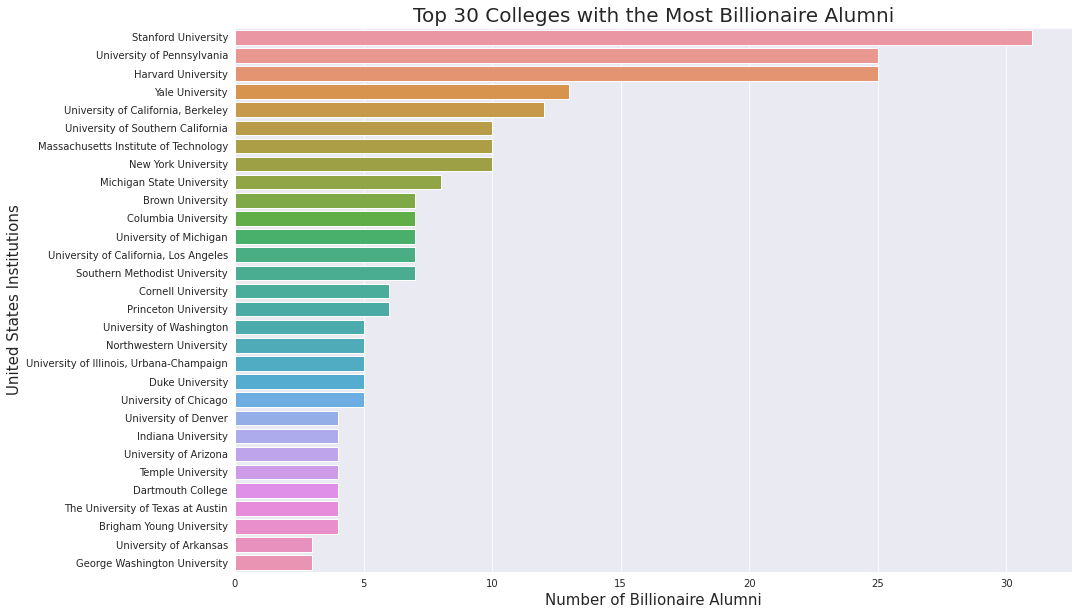

In [47]:
# draw barplot
f = plt.figure(figsize=(15,10))
sns.set_style("darkgrid") 
fig = sns.barplot(data = top_30_number, x= 'Num_Alumni', y= 'College')
plt.xlabel('Number of Billionaire Alumni', fontsize = '15')
plt.ylabel('United States Institutions', fontsize = '15')
plt.title('Top 30 Colleges with the Most Billionaire Alumni', fontsize = '20')

Text(0.5, 1.0, 'Top 30 Colleges with the Most Billionaire Alumni Weighted by Wealth')

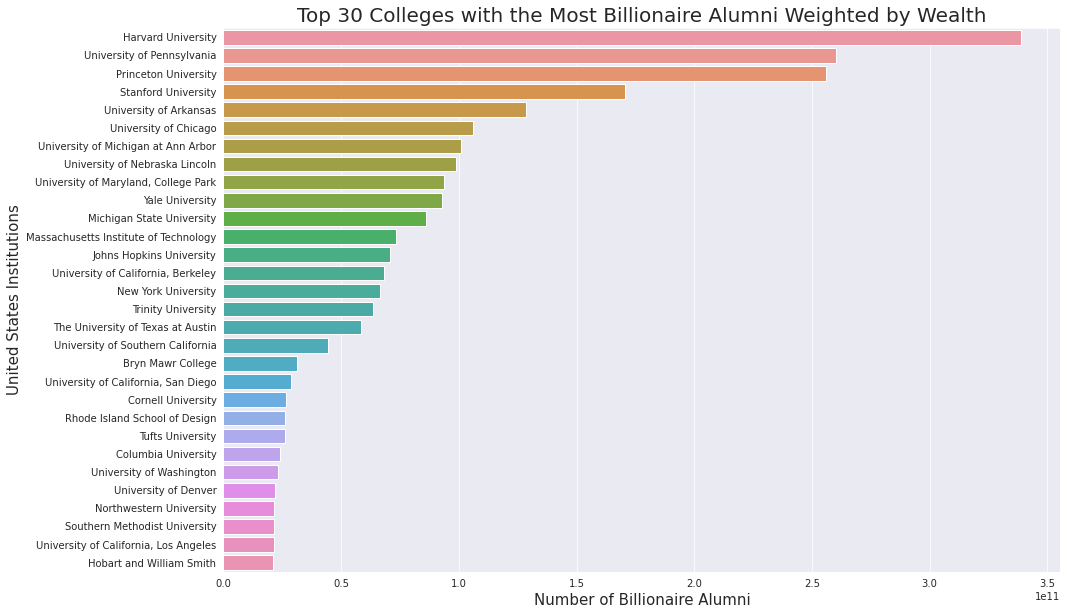

In [48]:
# draw barplot
f = plt.figure(figsize=(15,10))
sns.set_style("darkgrid") 
fig = sns.barplot(data = top_30_networth, x= 'NetWorth', y= 'College')
plt.xlabel('Number of Billionaire Alumni', fontsize = '15')
plt.ylabel('United States Institutions', fontsize = '15')
plt.title('Top 30 Colleges with the Most Billionaire Alumni Weighted by Wealth', fontsize = '20')

**The bar plots confirm the trend that both number and networth of billionaire alumni is caused by a few colleges.We notice that some colleges appear in both plots, while some only appear in one. Let's look at which schools they are.**

In [49]:
# colleges that exceed in alumni networth but not numbers
higher_networth= []
for college in top_30_networth['College']:
    if college not in top_30_number['College'].tolist():
        higher_networth.append(college)
        
# colleges that exceed in number of alumni but not networth
higher_amount= []
for college in top_30_number['College']:
    if college not in top_30_networth['College'].tolist():
        higher_amount.append(college)

In [50]:
print("Colleges that have higher networth alumni:", higher_networth)
print("\nColleges that have higher amount of billionaire alumni:", higher_amount)

Colleges that have higher networth alumni: ['University of Michigan at Ann Arbor', 'University of Nebraska Lincoln', 'University of Maryland, College Park', 'Johns Hopkins University', 'Trinity University', 'Bryn Mawr College', 'University of California, San Diego', 'Rhode Island School of Design', 'Tufts University', 'Hobart and William Smith']

Colleges that have higher amount of billionaire alumni: ['Brown University', 'University of Michigan', 'University of Illinois, Urbana-Champaign', 'Duke University', 'Indiana University', 'University of Arizona', 'Temple University', 'Dartmouth College', 'Brigham Young University', 'George Washington University']


## 3. Histogram: how are graduation rates distributed? 

**We would like to take a look at the distribution of the undergraduate graduation rates across the United States institutions in four and six years. Histograms would be appropriate for the visualization of distributions. The generation of such two histograms will give us a holistic picture of the undergraduate instituion graduation rates in America, which is essential for our further analysis in determining if there is a corrleation between the undergraduate graduation rates within expected time and number of billionaires.**

Text(0.5, 1.0, 'Undergraduate Graduation Rates Acorss US Institutions (4 years)')

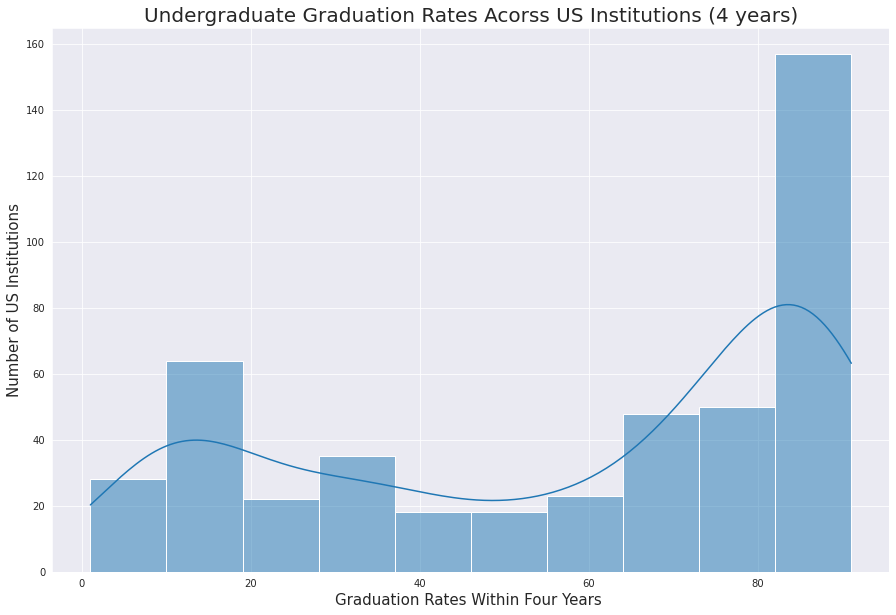

In [51]:
f, ax = plt.subplots(figsize=(15, 10))
p = sns.set_style("darkgrid") 
sns.histplot(data = updated_cc_df['grad_100_value'],
             kde = True, 
             bins = 10, 
             stat = 'count',
             element = 'bars',
             fill = True,
             cbar = True,
            )
plt.xlabel('Graduation Rates Within Four Years ', fontsize = '15')
plt.ylabel('Number of US Institutions', fontsize = '15')
plt.title('Undergraduate Graduation Rates Acorss US Institutions (4 years)', fontsize = '20')

**The histogram above showcases a left skewed distribution of undergraduate graduation rates in four years across the US institutions. This visualization has met our intuition as the majority of 158 colleges undergraduate graduation rates were higher than 80%. We predict that its six year counter part will demonstrate a similar trend.**

Text(0.5, 1.0, 'Undergraduate Graduation Rates Acorss US Institutions (6 years)')

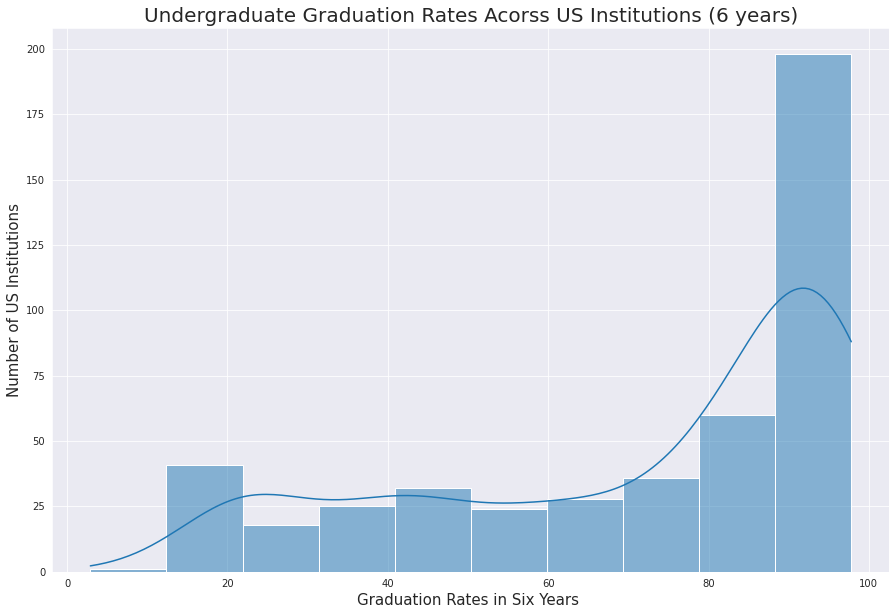

In [52]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid") 
sns.histplot(data = updated_cc_df['grad_150_value'],
             kde = True, 
             bins = 10, 
             stat = 'count',
             element = 'bars',
             fill = True,
             cbar = True,
            )
plt.xlabel('Graduation Rates in Six Years ', fontsize = '15')
plt.ylabel('Number of US Institutions', fontsize = '15')
plt.title('Undergraduate Graduation Rates Acorss US Institutions (6 years)', fontsize = '20')

**We can pinpoint a more intensified left skew from the histogram of the distribution of undergraduate graduation rates across US institutions in six years than its counterpart of four years. Furthermore, the number of colleges which had dropout rates higher than 80% (around 260) surpassed their counterparts in the previous four years histogram. We could infer that more time might give students opportunities and motivations to complete their studies, which led to higher dropout rates among more institutions.**

## 4. Boxplot: Do the graduation within expected time rates differ across colleges of different types?

**Let's now take a look at the relationship between the type of a college and the graduation rate of students within expected time. First, we can see our distribution of types of colleges in our data.**

In [53]:
updated_cc_df['type'].value_counts()

Private not-for-profit    258
Public                    204
Private for-profit          1
Name: type, dtype: int64

**We can now produce a boxplot using our dataset that compares the distribution of students who graduated within 4 years between the three types of colleges.**

Text(0.5, 1.0, 'Graduation Rates Across College Types')

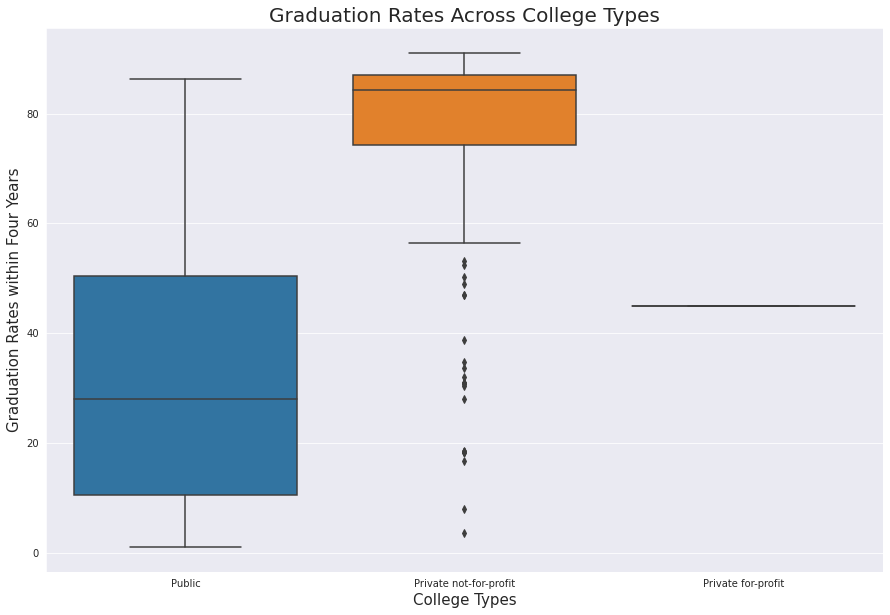

In [54]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid") 
sns.boxplot(x='type', y='grad_100_value', data=updated_cc_df)
plt.xlabel('College Types', fontsize = '15')
plt.ylabel('Graduation Rates within Four Years', fontsize = '15')
plt.title('Graduation Rates Across College Types', fontsize = '20')

**We can see that the distribution of graduation rates for public schools is significantly lower than private schools. Let's also take a look at the distribution of students who graduated within 6 years across the three types of colleges.**

Text(0.5, 1.0, 'Graduation Rates Across College Types')

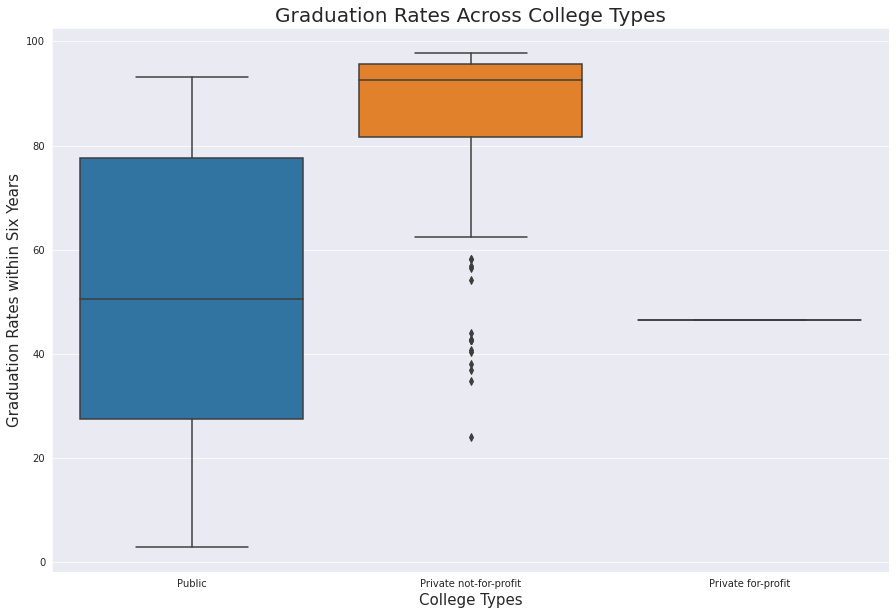

In [55]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid") 
sns.boxplot(x='type', y='grad_150_value', data=updated_cc_df)
plt.xlabel('College Types', fontsize = '15')
plt.ylabel('Graduation Rates within Six Years', fontsize = '15')
plt.title('Graduation Rates Across College Types', fontsize = '20')

**Again, we can see that the distribution of graduation rates for public schools is lower than private schools. For both boxplots we can see that private not-for-profit schools have a higher median in graduation rates than private for-profit schools.**

## 5. Choropleth: Do the graduation within expected time rates differ acorss colleges at different locations?

**We would like to see distribution of networth across the United State. Using choropleth would be the best way to visulize distributions. We first generate a choropleth to see the number of billionaires graduating from each state. Then, we generate another a choropleth to see the distribution of networth from the location of the billionaires undergraduate institution**



**We first want to transfrom all the states in merged_df_1 into its initials  so that the data could be read by ploty express.**

In [56]:
        merged_df_1 = merged_df_1.replace('Alabama', 'AL')
       
        merged_df_1 = merged_df_1.replace('Connecticut', 'CT')
        merged_df_1 = merged_df_1.replace('Colorado', 'CO')
        merged_df_1 = merged_df_1.replace('California', 'CA')
        merged_df_1 = merged_df_1.replace('Arkansas', 'AR')
        merged_df_1 = merged_df_1.replace('Arizona', 'AZ')
        
       
        merged_df_1 = merged_df_1.replace('West Virginia', 'WV')
        merged_df_1 = merged_df_1.replace('Washington', 'WA')
        merged_df_1 = merged_df_1.replace('Virginia', 'VA')
        merged_df_1 = merged_df_1.replace('Vermont', 'VT')
        merged_df_1 = merged_df_1.replace('Utah', 'UT')
        merged_df_1 = merged_df_1.replace('Texas', 'TX')
        merged_df_1 = merged_df_1.replace('Tennessee', 'TN')
    
        merged_df_1 = merged_df_1.replace('South Carolina', 'SC')
        merged_df_1 = merged_df_1.replace('Rhode Island', 'RI')
        merged_df_1 = merged_df_1.replace('Pennsylvania', 'PA')
        merged_df_1 = merged_df_1.replace('Oregon', 'OR')
        merged_df_1 = merged_df_1.replace('Oklahoma', 'OK')
        merged_df_1 = merged_df_1.replace('Ohio', 'OH')
        merged_df_1 = merged_df_1.replace('North Dakota', 'ND')
        
        merged_df_1 = merged_df_1.replace('New York', 'NY')
      
        merged_df_1 = merged_df_1.replace('New Jersey', 'NJ')
        merged_df_1 = merged_df_1.replace('New Hampshire', 'NH')
        
        
       
        merged_df_1 = merged_df_1.replace('Montana', 'MT')
        
        merged_df_1 = merged_df_1.replace('Missouri', 'MO')
        merged_df_1 = merged_df_1.replace('Mississippi', 'MS')
        merged_df_1 = merged_df_1.replace('Minnesota', 'MN')
        merged_df_1 = merged_df_1.replace('Michigan', 'MI')
                                
        merged_df_1 = merged_df_1.replace('Massachusetts', 'MA')
        merged_df_1 = merged_df_1.replace('Maryland', 'MD')
        
        merged_df_1 = merged_df_1.replace('Maine', 'ME')
                                
        merged_df_1 = merged_df_1.replace('Louisiana', 'LA')
        merged_df_1 = merged_df_1.replace('Kentucky', 'KA')
        merged_df_1 = merged_df_1.replace('Kansas', 'KS')
    
                                
        merged_df_1 = merged_df_1.replace('Indiana', 'IN')
        merged_df_1 = merged_df_1.replace('Illinois', 'IL')
     
       
        merged_df_1 = merged_df_1.replace('Georgia', 'GA')
        merged_df_1 = merged_df_1.replace('Florida', 'FL')
        
        merged_df_1 = merged_df_1.replace('District of Columbia', 'DC')
        merged_df_1 = merged_df_1.replace('North Carolina', 'NC')
        merged_df_1 = merged_df_1.replace('Wisconsin', 'WI')
        

**Then, we generate a choropleth that shows the amount of billionaire graduating from each states**

In [67]:
state_df = merged_df_1[['College', 'state']]
count_state_df = count_df.merge(state_df, left_index=True, right_on='College')
count_state_df = count_state_df.drop_duplicates().reset_index()
count_state_df = count_state_df.drop(columns=['index'])
by_state = count_state_df.groupby('state').sum()
by_state = by_state.reset_index()
by_state

,state,Num_Alumni
0,AL,4
1,AR,7
2,AZ,5
3,CA,86
4,CO,9
5,CT,15
6,DC,6
7,FL,11
8,GA,3
9,IL,21


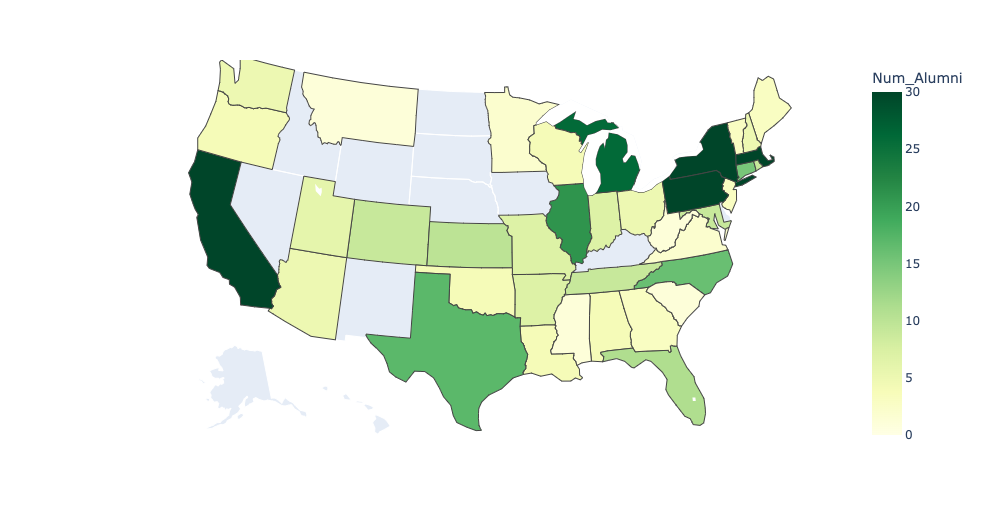

In [76]:
fig2 = px.choropleth(by_state, locations='state', locationmode="USA-states",color='Num_Alumni',
                           color_continuous_scale="YlGn",
                           range_color=(0, 30),
                           scope="usa",
                          )

# because Github can't render the chloropleth for some reason
Image(filename="./choropleth_Num_Alu.png")


**From the above choropleth, we can see that states like Pennsylvania, Massachusetts, New York, California, and New Hampshire have most billionaires graduating from there.**

**Next, we generate another choropleth that shows the states' networth (based on the location of billionaires undergraduate institution).**

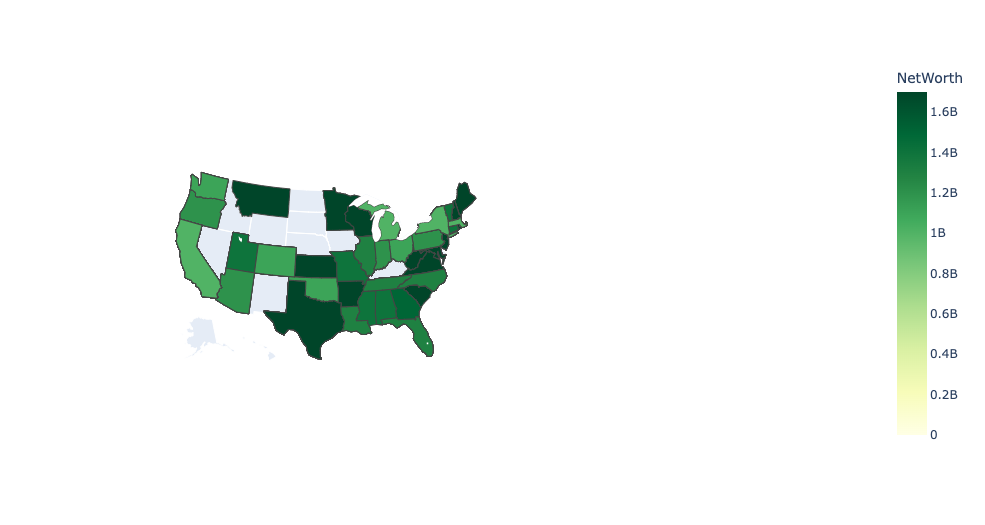

In [75]:
fig1 = px.choropleth(merged_df_1, locations='state', locationmode="USA-states",color='NetWorth',
                           color_continuous_scale="YlGn",
                           range_color=(0, 1700000000),
                           scope="usa",
                          )


# because Github can't render the chloropleth for some reason
Image(filename="./choropleth_networth.png")

**As we can see, there is no strong postivie correlation between the number of billionaries' graduating from the state, and the total networth of that state. One clear example is that, California contains the most billionaries' undergraduate institution, however, the total networth of California is less than Texas, which only contains 17 number of billionaires graduating from the state.**

# Further Analysis

**Now to address our research question, let's visualize the relationship between billionaire counts and graduation within expected time rates. We can begin by plotting the relationship between these two variables.**

Text(0.5, 1.0, 'Gradution Rates (4 years) VS. Number of Billionaire Alumni')

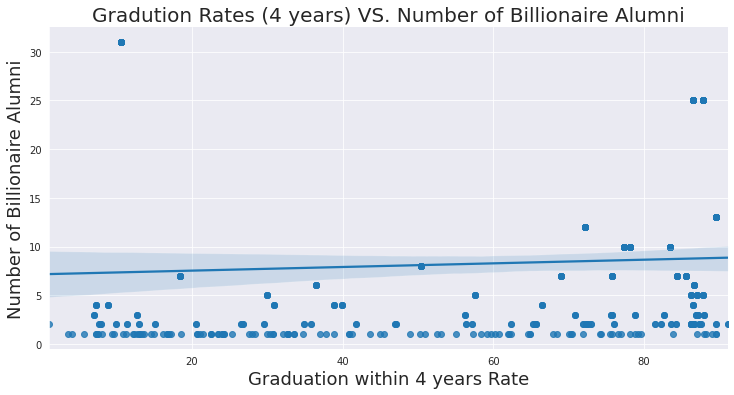

In [59]:
sns.lmplot(x='grad_100_value', y='Num_Alumni', data=updated_cc_df, aspect=2)
plt.xlabel('Graduation within 4 years Rate', size=18)
plt.ylabel('Number of Billionaire Alumni', size=18)
plt.title('Gradution Rates (4 years) VS. Number of Billionaire Alumni', size = 20)

**Let's also plot the relationship between billionaire counts and graduation within 150% of expected time rates.**

Text(0.5, 1.0, 'Gradution Rates (6 years) VS. Number of Billionaire Alumni')

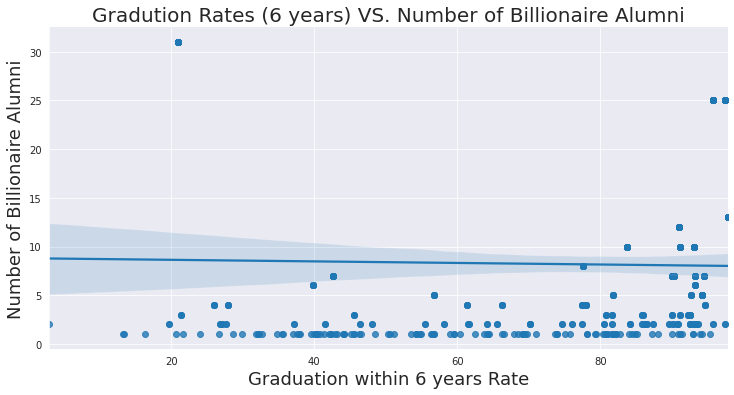

In [60]:
sns.lmplot(x='grad_150_value', y='Num_Alumni', data=updated_cc_df, aspect=2)
plt.xlabel('Graduation within 6 years Rate', size=18)
plt.ylabel('Number of Billionaire Alumni', size=18)
plt.title('Gradution Rates (6 years) VS. Number of Billionaire Alumni', size = 20)

# OLS

**First, let's use linear regression to determine the effect that graduation within 4 years rate has on the number of billionaire alumni coming out of a school.**

In [61]:
outcome, predictors = patsy.dmatrices('grad_100_value ~ Num_Alumni', updated_cc_df)
mod_log = sm.OLS(outcome, predictors)
res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:         grad_100_value   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.629
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.202
Time:                        12:20:03   Log-Likelihood:                -2229.6
No. Observations:                 463   AIC:                             4463.
Df Residuals:                     461   BIC:                             4471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.6898      1.846     30.170      0.0

**Since we have used an alpha value of 0.05 and the p-value for Num_Alumni appears to be 0.202, so we would accept the null hypothesis and claim there is not a relationship between the graduation within four year rates of US institutions and the number of billionaire alumni.**

**Let's also use linear regression to analyze the effect that graduation within 5 years rate has on the number of billionaire alumni.**

In [62]:
outcome_150, predictors_150 = patsy.dmatrices('grad_150_value ~ Num_Alumni', updated_cc_df)
mod_log_150 = sm.OLS(outcome_150, predictors_150)
res_log_150 = mod_log_150.fit()

print(res_log_150.summary())

                            OLS Regression Results                            
Dep. Variable:         grad_150_value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2293
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.632
Time:                        12:20:03   Log-Likelihood:                -2168.4
No. Observations:                 463   AIC:                             4341.
Df Residuals:                     461   BIC:                             4349.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.0735      1.617     44.565      0.0

**Since we have used an alpha value of 0.05 and the p-value for Num_Alumni appears to be 0.632, so we would accept the null hypothesis and claim there is not a relationship between the graduation within six year rates of US institutions and the number of billionaire alumni.**

## Pearson Correlation
**We can also measure the linear relationship between the graduation rates of colleges within expected time and the number of billionaire alumni by calculating the pearson correlation coefficient.**

In [63]:
updated_cc_df
print('correlation for graduation in 4 years and billionare alumni count: ', pearsonr(updated_cc_df['grad_100_value'],updated_cc_df['Num_Alumni']))
print('correlation for graduation in 6 years and billionare alumni count: ', pearsonr(updated_cc_df['grad_150_value'],updated_cc_df['Num_Alumni']))

correlation for graduation in 4 years and billionare alumni count:  (0.059346183927644736, 0.20243334093479723)
correlation for graduation in 6 years and billionare alumni count:  (-0.022294667542467773, 0.6323037889923132)


**It appears that both the Pearson correlation coefficient for graduation within 4 years and 6 years are close to 0, which suggests that there is a weak correlation relationship between graudation rate within expected time and number of billionaire alumni.**

# Ethics & Privacy

All our data come from publicly available datasets and was ethically obtained. The billionaires’ education background data comes from Forbes World's Billionaire Profile. After cleaning the data, we also dropped personally identifiable information such as their name, age, and residence. The college completion rates data comes from The Chronicle of Higher Education, a publicly available newspaper.  

There are several biases that we need to account for. First, the cultural background may influence the resources that an individual can rely on after dropping out, so we need to consider whether the billionaire was born in the United States or an immigrant. Since we don’t have available datasets about the billionaires’ ethinic background, we dropped all foreign colleges and only counted billionaires whose citizenship is American. Second, some of the billionaires were self-made and others inherited a significant amount of wealth from their families. We did not separate these two categories in our analysis, so we will note in our interpretation of results that those from wealthier backgrounds are more likely to become billionaires after dropping out to ensure equitable analysis. 

Our research might have an unintended consequence of encouraging people to drop out of school if we discover a statistically significant relationship between dropout rates and the number of billionaire alumni. However, since we’re only conducting classical statistical tests, our research does not implicate causation. In addition, to avoid misleading impressions about the billionaires, we will not make any assumptions about the reason for dropping out. 

# Conclusion & Discussion

Both the linear regression and the Pearson correlation test show that there is no statistically significant relationship between the dropout rates of U.S. colleges and the number of billionaire alumni that came from the school. We retain the null hypothesis that there is no correlation between graduation rates within expected time and number of billionaire alumni. It seems that the impression that many well-known billionaires are college drop-outs is based on only a few examples. Nevertheless, the conclusion drawn from our study may not be generalizable. There are several limitations of our study that may have affected the results. 

One of the biggest limitations of the study comes from the lack of data that we have. After merging the data frames, we are left with 185 colleges in the U.S. and over half of them have only 1 billionaire alumni. This severely impacts the confidence in our interpretation. Even though we tried to complement by weighing the billionaires by their net worth, a better solution would probably be to use the world's billionaires from more countries and over a wider time range. 

Also, some of the same colleges are named differently in the dataset of billionaires and the dataset of colleges, so we had to manually input them when we merge the two. This process may introduce errors. 

Further, we have not accounted for whether the billionaires are self-made or inherited. People from a wealthier family possibly have a higher chance of becoming a billionaire after they drop out of school, and have stronger financial support for their decision to drop out. If time allows, a potential improvement to our study would be to include the “self-made score” from Forbes for each billionaire, in addition to weighting them by their net worth.  


# Team Contributions

**Yiyao Liu**: Contributed to the formation of a hypothesis, Brainstormed the research question, Performed web scraping to gather educational information of billionaires, Wrote function to standardize names, Contributed to the merging process, Filled missing values manually in datasets, added explanations in markdown cells, Generated bar plots under EDA, Helped synchronizing and compiling individual files, Troubleshooting bugs, Wrote paragraphs under ethics and privacy, Provided information for the conclusion and discussion session

**Justin Lee**: Contributed to the formation of a hypothesis, Carried out initial overviews of both datasets, Brainstormed the research question, Performed data cleaning on the institution details data frame, Contributed to the merging process, added explanations in markdown cells, Generated boxplots under EDA, Performed OLS and Pearson Correlation Test, and produced corresponding visualizations under further analysis, Provided solutions to errors, Helped synchronizing and compiling individual files, Provided information for the conclusion and discussion session

**Duye Liu**: Contributed to the formation of a hypothesis, Brainstormed the research question, Performed data cleaning on the billionaire data frame and contributed to the merging process, Filled missing values manually in datasets, added explanations in markdown cells, Generated choropleths under EDA, Helped synchronizing and compiling individual files, Pinpointing potential issues and provided tentative solutions, Produced Correlation heat map under further analysis, Wrote paragraphs under ethics and privacy

**Sally Yu**: Constructed the project overview, Wrote the introduction, Conducted background research on one paper, Contributed to the formation of a hypothesis, Brainstormed the research question, Performed data cleaning on the billionaire data frame and wrote functions to standardize college names, Filled missing values manually in datasets, facilitated the merging process, added explanations in markdown cells, Troubleshooting bugs, Helped synchronizing and compiling individual files, Provided information for the conclusion and discussion session

**Jie Mei (MJ)**: Conducted background research on two papers, Contributed to the formation of  a hypothesis, Brainstormed the research question, Performed data cleaning on the billionaire data frame and wrote a function to standardize college names, Filled missing values manually in datasets, facilitated the merging process, Helped synchronizing and compiling individual files, added explanations in markdown cells, Troubleshooting bugs, Generated histograms under EDA, Completed the team contribution session

